In [ ]:
# Installation of all the required libraries
#!pip install scikit-learn
#!pip install tensorflow
#!pip install accelerate -U  
#!pip install transformers[torch]  
#!pip install torch          
#!pip install openpyxl   

In [2]:
# Importing all the necessary libraries
import sklearn
import pandas as pd
import pickle
import time
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean
#performance and evaluation of test data using metrics - accuracy score, confusion matrix, and classification report.
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
#Classiifers - Logistic Regression, SVC, Random Forest, KNN and MLP are trained on the training data.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.neural_network import MLPClassifier  
from sklearn.model_selection import StratifiedKFold, GridSearchCV, KFold, cross_val_score

In [3]:
# Random Forest Model
# Function to build and evaluate a Random Forest model
def build_model_RF(X_train, y_train, X_test, y_test, name_of_test):
    start_time = time.time()
    rfc = RandomForestClassifier()
    #parameters
    max_depth = [3, 5, 10, None]
    min_samples_leaf = [1, 5, 10]
    min_samples_split = [2, 10, 20]
    max_features = ['log2','sqrt']

    # Grid search parameters
    grid = dict(max_depth=max_depth,min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, max_features=max_features)
    cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    grid_search = GridSearchCV(estimator=rfc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X_train, y_train)

    #Results
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

    # Best Model
    best_model = RandomForestClassifier(**grid_result.best_params_)
    best_model.fit(X_train, y_train)
    
    # Prediction of labels for the test set
    y_pred = best_model.predict(X_test)
    # Printing the training accuracy
    print(
        "Training accuracy of " + name_of_test + ": ", best_model.score(X_train, y_train)
    )
    # Printing the testing accuracy
    print(
        "Test accuracy of " + name_of_test + ": ", best_model.score(X_test, y_test)
    )

    #classification report
    print(classification_report(y_test, y_pred))
    # confusion matrix
    print(confusion_matrix(y_test,y_pred))
    # precision, recall, fscore
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("tn:",tn)
    print("fp:",fp)
    print("fn:",fn)
    print("tp:",tp)
    
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    fpr,tpr,thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(fpr,tpr) 
    plt.figure()
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (area=%0.2f)'% roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characterstic (ROC) Curve')
    plt.legend(loc = 'upper right')
    plt.show()
    # Saving the best model
    with open('glove_rf_model2.pkl', 'wb') as file:
        pickle.dump(best_model, file)
    end_time = time.time()
    print(f"The time required for training is {end_time-start_time} seconds")
    return best_model

In [4]:
# Support Vector Machine model
# Function to build and evaluate a Support Vector Machine model
def build_model_SVC(X_train, y_train, X_test, y_test, name_of_test):
    start_time = time.time()
    svc = SVC()
    #define parameters
    C = [0.1, 1, 10]
    gamma_val = ['scale', 'auto']
    kernel_val = ["rbf", "linear", "sigmoid"]

    # Grid search parameters
    grid = dict(C=C, gamma=gamma_val, kernel=kernel_val)
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    grid_search = GridSearchCV(estimator=svc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X_train, y_train)
    # best model
    best_model = SVC(**grid_result.best_params_)
    best_model.fit(X_train, y_train)
    #Results
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    # Prediction of labels for the test set
    y_pred = best_model.predict(X_test)


    # training accuracy
    print(
        "Training accuracy of " + name_of_test + ": ", best_model.score(X_train, y_train)
    )
    # testing accuracy
    print("Testing accuracy of " + name_of_test + ": ", best_model.score(X_test, y_test))

    # classification report
    print(classification_report(y_test, y_pred))
    # confusion matrix
    print(confusion_matrix(y_test,y_pred))
    # precision, recall and fscore
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("tn:",tn)
    print("fp:",fp)
    print("fn:",fn)
    print("tp:",tp)
    
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    fpr,tpr,thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(fpr,tpr) 
    plt.figure()
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (area=%0.2f)'% roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characterstic (ROC) Curve')
    plt.legend(loc = 'upper right')
    plt.show()
    # Saving the best model
    with open('glove_svc_model2.pkl', 'wb') as file:
        pickle.dump(best_model, file)
    end_time = time.time()
    print(f"The time required for training is {end_time-start_time} seconds")
    
    return best_model

In [5]:
# Logistic Regression Model
# Function to build and evaluate a Logistic Regression model
def build_model_LR(X_train, y_train, X_test, y_test, name_of_test):
    start_time = time.time()
    log_reg = LogisticRegression()
    
    #define parameters
    solvers = ['newton-cg','lbfgs','saga'] #Suitable for large datasets
    penalty = ['l2','l1']
    c_values = [100, 10, 1.0, 0.1]
    max_iter = [100, 200, 300]

    #grid_search
    grid = dict(solver = solvers, penalty = penalty, C=c_values, max_iter=max_iter)
    cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    grid_search = GridSearchCV(estimator=log_reg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X_train, y_train)
    

    #Results
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    #best model
    best_model = LogisticRegression(**grid_result.best_params_)
    best_model.fit(X_train, y_train)
    
    # Prediction of labels for the test set
    y_pred = best_model.predict(X_test)
    # training accuracy
    print(
        "Training accuracy of " + name_of_test + ": ", best_model.score(X_train, y_train)
    )
    # testing accuracy
    print("Testing accuracy of " + name_of_test + ": ", best_model.score(X_test, y_test))

    # classification report
    print(classification_report(y_test, y_pred))  # Evaluating prediction ability
    # confusion matrix
    print(confusion_matrix(y_test,y_pred))

    # precision, recall and fscore
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("tn:",tn)
    print("fp:",fp)
    print("fn:",fn)
    print("tp:",tp)
    
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    fpr,tpr,thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(fpr,tpr) 
    plt.figure()
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (area=%0.2f)'% roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characterstic (ROC) Curve')
    plt.legend(loc = 'upper right')
    plt.show()
    # Save best model
    with open('glove_lr_model2.pkl', 'wb') as file:
        pickle.dump(best_model, file)
    end_time = time.time()
    print(f"The time required for training is {end_time-start_time} seconds")
    return best_model

In [6]:
# Building KNN model to find the best model and testing
def build_model_KNN(X_train, y_train, X_test, y_test, name_of_test):
    start_time = time.time()
    knn = KNeighborsClassifier()

    # Define parameters for grid search
    n_neighbors = [3, 5, 7, 9, 11]
    weights = ['uniform', 'distance']
    metric = ['euclidean', 'manhattan', 'minkowski']

    # grid_search
    grid = dict(n_neighbors=n_neighbors, weights=weights, metric=metric)
    cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    grid_search = GridSearchCV(estimator=knn, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
    grid_result = grid_search.fit(X_train, y_train)

    # Results
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

    best_model = KNeighborsClassifier(**grid_result.best_params_)
    best_model.fit(X_train, y_train)

    # Prediction of labels for the test set
    y_pred = best_model.predict(X_test)

    # Evaluation metrics
    print("Training accuracy of " + name_of_test + ": ", best_model.score(X_train, y_train))
    print("Testing accuracy of " + name_of_test + ": ", best_model.score(X_test, y_test))

    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    #precision, recall and fscore
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("tn:",tn)
    print("fp:",fp)
    print("fn:",fn)
    print("tp:",tp)
    
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    fpr,tpr,thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(fpr,tpr) 
    plt.figure()
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (area=%0.2f)'% roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characterstic (ROC) Curve')
    plt.legend(loc = 'upper right')
    plt.show()

    #Save the best knn model
    with open('glove_knn_model2.pkl', 'wb') as file:
        pickle.dump(best_model, file)
    end_time = time.time()
    print(f"The time required for training is {end_time-start_time} seconds")
    return best_model

In [7]:
# MLP (Multilayer Perceptron) model
# Function to build and evaluate a MLP model
def build_model_MLP(X_train, y_train, X_test, y_test, name_of_test):
    start_time = time.time()
    # Creation of an instance for MLPClassifier model
    mlp = MLPClassifier(max_iter=1000)

    # Define parameters for grid search
    hidden_layer_sizes = [(50,), (100,), (50,50), (100,50), (100,100)]
    activation = ['tanh', 'relu']
    solver = ['adam', 'sgd']
    alpha = [0.0001, 0.05]
    learning_rate = ['constant','adaptive']

    # grid_search
    grid = dict(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, alpha=alpha, learning_rate=learning_rate)
    cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    grid_search = GridSearchCV(estimator=mlp, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
    grid_result = grid_search.fit(X_train, y_train)

    # Results
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

    best_model = MLPClassifier(**grid_result.best_params_, max_iter=1000)
    best_model.fit(X_train, y_train)

    # Prediction of labels for the test set
    y_pred = best_model.predict(X_test)

    # Evaluation metrics
    print("Training accuracy of " + name_of_test + ": ", best_model.score(X_train, y_train))
    print("Testing accuracy of " + name_of_test + ": ", best_model.score(X_test, y_test))

    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    # Calculation of precision, recall and fscore
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("tn:",tn)
    print("fp:",fp)
    print("fn:",fn)
    print("tp:",tp)
    
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    fpr,tpr,thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(fpr,tpr) 
    plt.figure()
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (area=%0.2f)'% roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characterstic (ROC) Curve')
    plt.legend(loc = 'upper right')
    plt.show()
    #Saving the best mlp model
    with open('glove_mlp_model2.pkl', 'wb') as file:
        pickle.dump(best_model, file)
    end_time = time.time()
    print(f"The time required for training is {end_time-start_time} seconds")
    return best_model

In [14]:
# Loading the glove model from glove_6B_100D.txt file
def load_glove_model(glove_file):
    print("Loading Glove Model")
    glove_model = {}
    with open(glove_file, 'r', encoding="utf8") as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array([float(val) for val in split_line[1:]])
            glove_model[word] = embedding
    print("Glove model loaded with {} words.".format(len(glove_model)))
    return glove_model

In [16]:
#Similar to W2V just that the model needs to be loaded manually
def transform_glove(training, testing, column_name, glove_file_path, vector_size=100):
    # Replace NaN values with an empty string
    training[column_name] = training[column_name].fillna('')
    testing[column_name] = testing[column_name].fillna('')

    # Tokenize the training and testing data
    training_tokens = [text.split() for text in training[column_name]]
    testing_tokens = [text.split() for text in testing[column_name]]

    # Load GloVe vectors for the words in the training data
    vocab = {word for tokens in training_tokens for word in tokens}  # Unique words in training data
    glove_fit = {}

    with open(glove_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.split()
            word = parts[0]
            if word in vocab:  # Load only words from the training vocabulary
                vector = np.array(parts[1:], dtype='float32')
                glove_fit[word] = vector

    print(f"Created glove_fit with {len(glove_fit)} word vectors.")

    # Function to compute embeddings using glove_fit
    def get_glove_embedding(words):
        # Compute the mean vector for words present in glove_fit
        embedding = np.mean(
            [glove_fit[word] for word in words if word in glove_fit] or [np.zeros(vector_size)],
            axis=0
        )
        return embedding

    # Create embeddings for training and testing datasets
    training_embeddings = np.array([get_glove_embedding(words) for words in training_tokens])
    training_embeddings_df = pd.DataFrame(training_embeddings)

    testing_embeddings = np.array([get_glove_embedding(words) for words in testing_tokens])
    testing_embeddings_df = pd.DataFrame(testing_embeddings)

    return glove_fit, training_embeddings_df, testing_embeddings_df


In [18]:
# Load train data
df_train = pd.read_csv("Dataset1_2Train_new3.csv")
df_train = df_train.sample(frac=1).reset_index(drop=True)
print("Total length of training data: ", len(df_train))
df_test = pd.read_csv("Dataset1_2Test_new3.csv",  encoding='latin1')
df_test = df_test.sample(frac=1).reset_index(drop=True)
print("Total length of testing data: ", len(df_test))

# Create Glove features for training set
glove_fit, df_train_glove_unstem, df_test_glove_unstem = transform_glove(
    df_train, df_test, "final_cleaned_text", "glove.6B.100d.txt"
)
print("...successfully created the unstemmed GloVe data")

# Loading the vectorizer fit on training data into file
with open('glove_vect_fit2.pkl', 'wb') as file:
    pickle.dump(glove_fit, file)

Total length of training data:  120000
Total length of testing data:  29500
Created glove_fit with 41581 word vectors.
...successfully created the unstemmed GloVe data


C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages

0.979808 (0.001499) with: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.979125 (0.001660) with: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.979783 (0.001509) with: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.979792 (0.001476) with: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
0.979808 (0.001499) with: {'C': 100, 'max_iter': 200, 'penalty': 'l2', 'solver': 'newton-cg'}
0.979125 (0.001660) with: {'C': 100, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
0.979792 (0.001493) with: {'C': 100, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 100, 'max_iter': 200, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'max_iter': 200, 'penalty': 'l1', 'solver': 'lbfgs

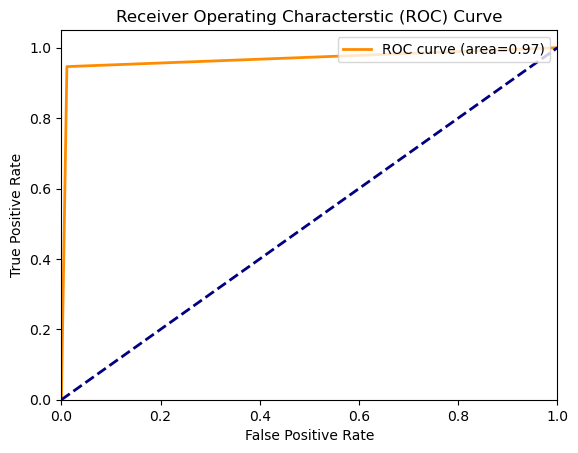

The time required for training is 292.6926534175873 seconds


In [40]:
#Building LR model to find the best model and testing
glove_lr_best_model = build_model_LR(
    df_train_glove_unstem,
    df_train["label"],
    df_test_glove_unstem,
    df_test["label"],
    "TFIDF Unstemmed",
)

0.989075 (0.000516) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.990842 (0.000397) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.987625 (0.000762) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.989842 (0.000471) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.986542 (0.001012) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.989067 (0.000569) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.985683 (0.000864) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.988550 (0.000526) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.985025 (0.000957) with: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
0.988150 (0.000634) with: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
0.989133 (0.000759) with: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
0.9

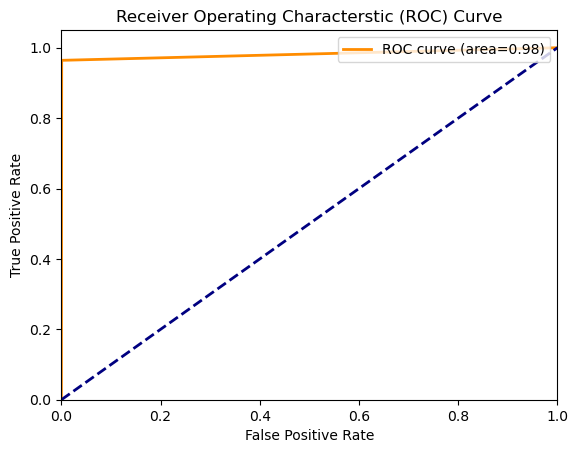

The time required for training is 742.0405766963959 seconds


In [41]:
#Building KNN model to find the best model and testing
glove_knn_best_model = build_model_KNN(
    df_train_glove_unstem,
    df_train["label"],
    df_test_glove_unstem,
    df_test["label"],
    "TFIDF Unstemmed",
)


0.994475 (0.000887) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
0.980175 (0.000894) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.994675 (0.000520) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.980283 (0.001152) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.994592 (0.000794) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
0.979550 (0.001478) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.994933 (0.000559) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.9799

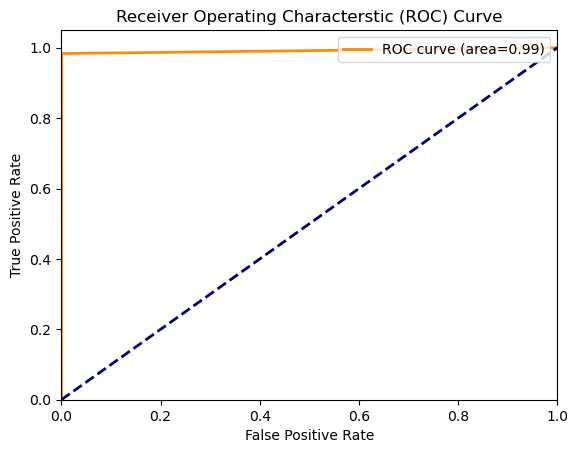

The time required for training is 5712.281285762787 seconds


In [42]:
#Building MLP model to find the best model and testing
glove_mlp_best_model = build_model_MLP(
    df_train_glove_unstem,
    df_train["label"],
    df_test_glove_unstem,
    df_test["label"],
    "TFIDF Unstemmed",
)


0.930050 (0.003981) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
0.929925 (0.003225) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10}
0.929925 (0.002757) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 20}
0.929142 (0.002897) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2}
0.929708 (0.003271) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 10}
0.929758 (0.002332) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 20}
0.929442 (0.002305) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 2}
0.930683 (0.002619) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 10}
0.929342 (0.002662) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_l

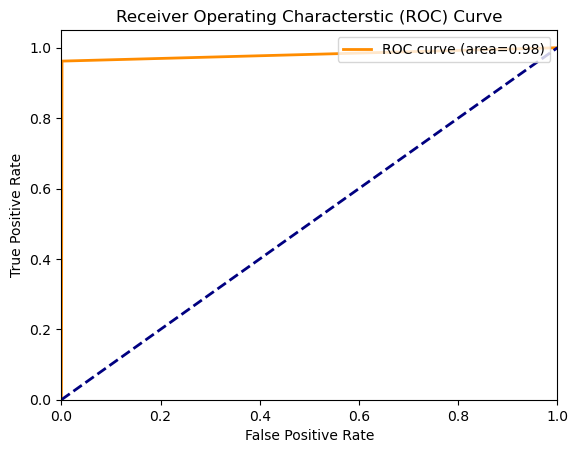

The time required for training is 2919.9473090171814 seconds


In [43]:
#Building RF model to find the best model and testing
glove_rf_best_model = build_model_RF(
    df_train_glove_unstem,
    df_train["label"],
    df_test_glove_unstem,
    df_test["label"],
    "TFIDF Unstemmed",
)

0.979292 (0.001061) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.979250 (0.001258) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
0.885483 (0.002206) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.966692 (0.001072) with: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
0.979250 (0.001258) with: {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
0.962342 (0.001458) with: {'C': 0.1, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.986467 (0.001197) with: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.980142 (0.001027) with: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.873667 (0.021768) with: {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.978308 (0.001252) with: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.980142 (0.001027) with: {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
0.972817 (0.001210) with: {'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.990783 (0.000858) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.980175 (0.000870) with: {'C': 10, 'gamma': 'scale', '

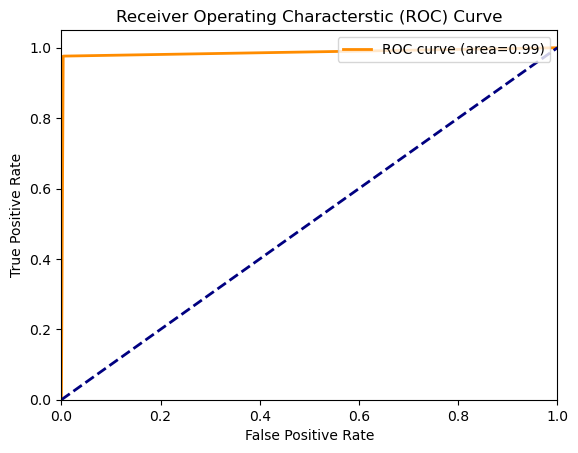

The time required for training is 9229.617891550064 seconds


In [44]:
#Building SVC model to find the best model and testing
glove_svc_best_model = build_model_SVC(
    df_train_glove_unstem,
    df_train["label"],
    df_test_glove_unstem,
    df_test["label"],
    "Glove Unstemmed"
)


In [50]:
# Loading the dataset for testing
df_test1 = pd.read_csv("Dataset2_2Train_new2.csv")
df_test2 = pd.read_csv("Dataset2_2Test_new2.csv")
df_test = pd.concat([df_test1, df_test2], axis=0, ignore_index=True)
df_test = df_test.sample(frac=1).reset_index(drop=True)

X_test1 = df_test['final_cleaned_text'].values
y_test = df_test['label'].values

In [51]:
# Function to generate document vectors using GloVe embeddings
def document_vector(glove_model, email):
    words = email.split()
    return np.mean([glove_model[word] for word in words if word in glove_model] or [np.zeros(len(next(iter(glove_model.values()))))], axis=0)
    
# Function to transform test data using GloVe embeddings
def transform_glove(X_test, glove_model):
    X_test_vectors = np.array([document_vector(glove_model, email) for email in X_test])
    return X_test_vectors

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     22458
           1       0.71      0.80      0.75      4491

    accuracy                           0.91     26949
   macro avg       0.83      0.87      0.85     26949
weighted avg       0.92      0.91      0.91     26949

[[20979  1479]
 [  913  3578]]
Precision: 0.7075341111330828
Recall: 0.7967045201514139
FScore: 0.7494763301214915
Testing Accuracy: 0.9112397491558129


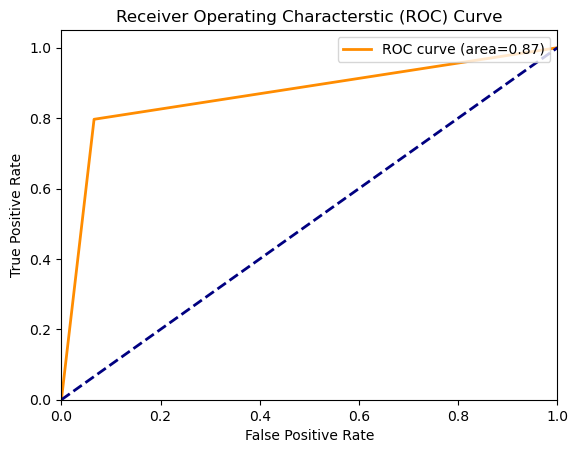

The time required for training is 3.2069947719573975 seconds


In [52]:
# Testing the best RF model
def check_best_model_RF(X_test1, y_test, glove_rf_best_model, glove_fit):
    start_time = time.time()
    X_test1 = pd.Series(X_test1)  
    X_test1 = X_test1.fillna('')  
    X_test_feature = transform_glove(X_test1,glove_fit)
    y_pred = glove_rf_best_model.predict(X_test_feature)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    accuracy = accuracy_score(y_test, y_pred)
    print("Testing Accuracy:",accuracy)
    fpr,tpr,thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(fpr,tpr) 
    plt.figure()
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (area=%0.2f)'% roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characterstic (ROC) Curve')
    plt.legend(loc = 'upper right')
    plt.show()
    end_time = time.time()
    print(f"The time required for training is {end_time-start_time} seconds")
glove_model = load_glove_model('glove.6B.100d.txt')  # Load GloVe vectors
check_best_model_RF(X_test1, y_test, glove_rf_best_model, glove_fit)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     22458
           1       0.75      0.80      0.77      4491

    accuracy                           0.92     26949
   macro avg       0.85      0.87      0.86     26949
weighted avg       0.92      0.92      0.92     26949

[[21273  1185]
 [  917  3574]]
Precision: 0.7509981088463963
Recall: 0.7958138499220664
FScore: 0.7727567567567567
Testing Accuracy: 0.9220008163568222


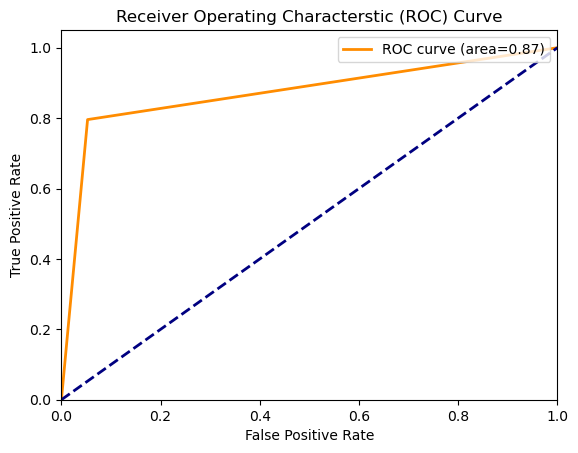

The time required for training is 2.9681127071380615 seconds


In [55]:
# Testing the best LR model
def check_best_model_LR(X_test1, y_test, glove_lr_best_model, glove_fit):
    start_time = time.time()
    X_test1 = pd.Series(X_test1)  
    X_test1 = X_test1.fillna('')  
    X_test_feature = transform_glove(X_test1,glove_fit)
    y_pred = glove_lr_best_model.predict(X_test_feature)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    accuracy = accuracy_score(y_test, y_pred)
    print("Testing Accuracy:",accuracy)
    fpr,tpr,thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(fpr,tpr) 
    plt.figure()
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (area=%0.2f)'% roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characterstic (ROC) Curve')
    plt.legend(loc = 'upper right')
    plt.show()
    end_time = time.time()
    print(f"The time required for training is {end_time-start_time} seconds")
check_best_model_LR(X_test1, y_test, glove_lr_best_model, glove_fit)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     22458
           1       0.78      0.69      0.73      4491

    accuracy                           0.92     26949
   macro avg       0.86      0.82      0.84     26949
weighted avg       0.91      0.92      0.91     26949

[[21580   878]
 [ 1398  3093]]
Precision: 0.7788970032737346
Recall: 0.6887107548430194
FScore: 0.7310328527534862
Testing Accuracy: 0.9155441760362165


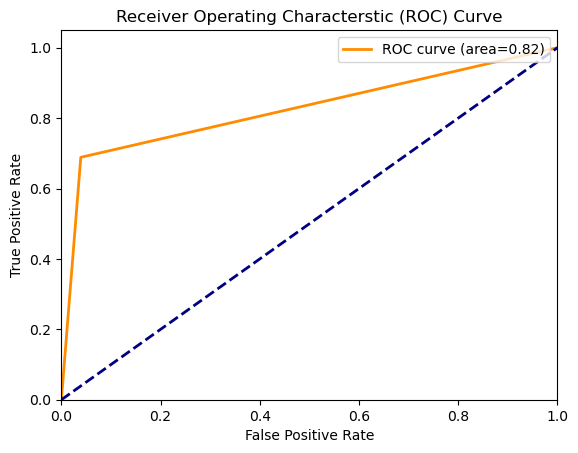

The time required for training is 19.777820348739624 seconds


In [56]:
# Testing the best KNN model
def check_best_model_KNN(X_test1, y_test, glove_knn_best_model, glove_fit):
    start_time = time.time()
    X_test1 = pd.Series(X_test1)  
    X_test1 = X_test1.fillna('')  
    X_test_feature = transform_glove(X_test1, glove_fit)
    y_pred = glove_knn_best_model.predict(X_test_feature)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    accuracy = accuracy_score(y_test, y_pred)
    print("Testing Accuracy:",accuracy)
    fpr,tpr,thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(fpr,tpr) 
    plt.figure()
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (area=%0.2f)'% roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characterstic (ROC) Curve')
    plt.legend(loc = 'upper right')
    plt.show()
    end_time = time.time()
    print(f"The time required for training is {end_time-start_time} seconds")
check_best_model_KNN(X_test1, y_test, glove_knn_best_model, glove_fit)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     22458
           1       0.79      0.85      0.82      4491

    accuracy                           0.94     26949
   macro avg       0.88      0.90      0.89     26949
weighted avg       0.94      0.94      0.94     26949

[[21446  1012]
 [  659  3832]]
Precision: 0.7910817506193228
Recall: 0.8532620797149856
FScore: 0.8209962506695233
Testing Accuracy: 0.9379939886452188


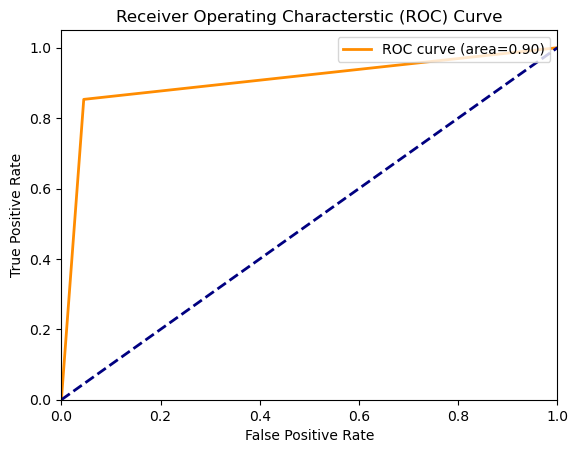

The time required for training is 2.934515953063965 seconds


In [57]:
# Testing the best MLP model
def check_best_model_MLP(X_test1, y_test, glove_mlp_best_model, glove_fit):
    start_time = time.time()
    X_test1 = pd.Series(X_test1)  
    X_test1 = X_test1.fillna('')  
    X_test_feature = transform_glove(X_test1, glove_fit)
    y_pred = glove_mlp_best_model.predict(X_test_feature)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    accuracy = accuracy_score(y_test, y_pred)
    print("Testing Accuracy:",accuracy)
    fpr,tpr,thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(fpr,tpr) 
    plt.figure()
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (area=%0.2f)'% roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characterstic (ROC) Curve')
    plt.legend(loc = 'upper right')
    plt.show()
    end_time = time.time()
    print(f"The time required for training is {end_time-start_time} seconds")
check_best_model_MLP(X_test1, y_test, glove_mlp_best_model, glove_fit)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     22458
           1       0.78      0.85      0.82      4491

    accuracy                           0.94     26949
   macro avg       0.88      0.90      0.89     26949
weighted avg       0.94      0.94      0.94     26949

[[21407  1051]
 [  658  3833]]
Precision: 0.7848075348075348
Recall: 0.8534847472723224
FScore: 0.8177066666666668
Testing Accuracy: 0.9365839177706037


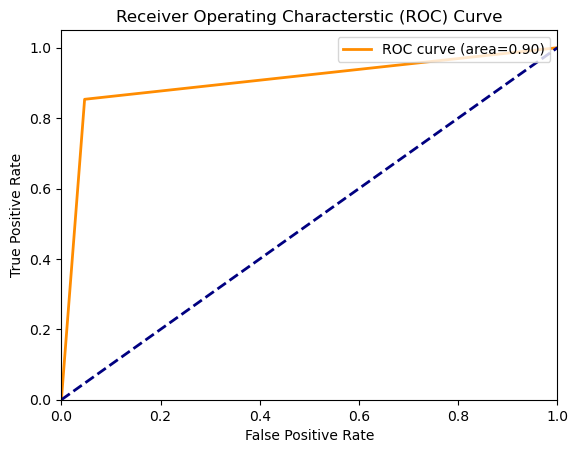

The time required for training is 12.181989192962646 seconds


In [58]:
# Testing the best SVC model
def check_best_model_SVC(X_test1, y_test, glove_svc_best_model, glove_fit):
    start_time= time.time()
    X_test1 = pd.Series(X_test1)  
    X_test1 = X_test1.fillna('')  
    X_test_feature = transform_glove(X_test1, glove_fit)
    y_pred = glove_svc_best_model.predict(X_test_feature)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    accuracy = accuracy_score(y_test, y_pred)
    print("Testing Accuracy:",accuracy)
    fpr,tpr,thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(fpr,tpr) 
    plt.figure()
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (area=%0.2f)'% roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characterstic (ROC) Curve')
    plt.legend(loc = 'upper right')
    plt.show()
    end_time = time.time()
    print(f"The time required for training is {end_time-start_time} seconds")
check_best_model_SVC(X_test1, y_test, glove_svc_best_model, glove_fit)

C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


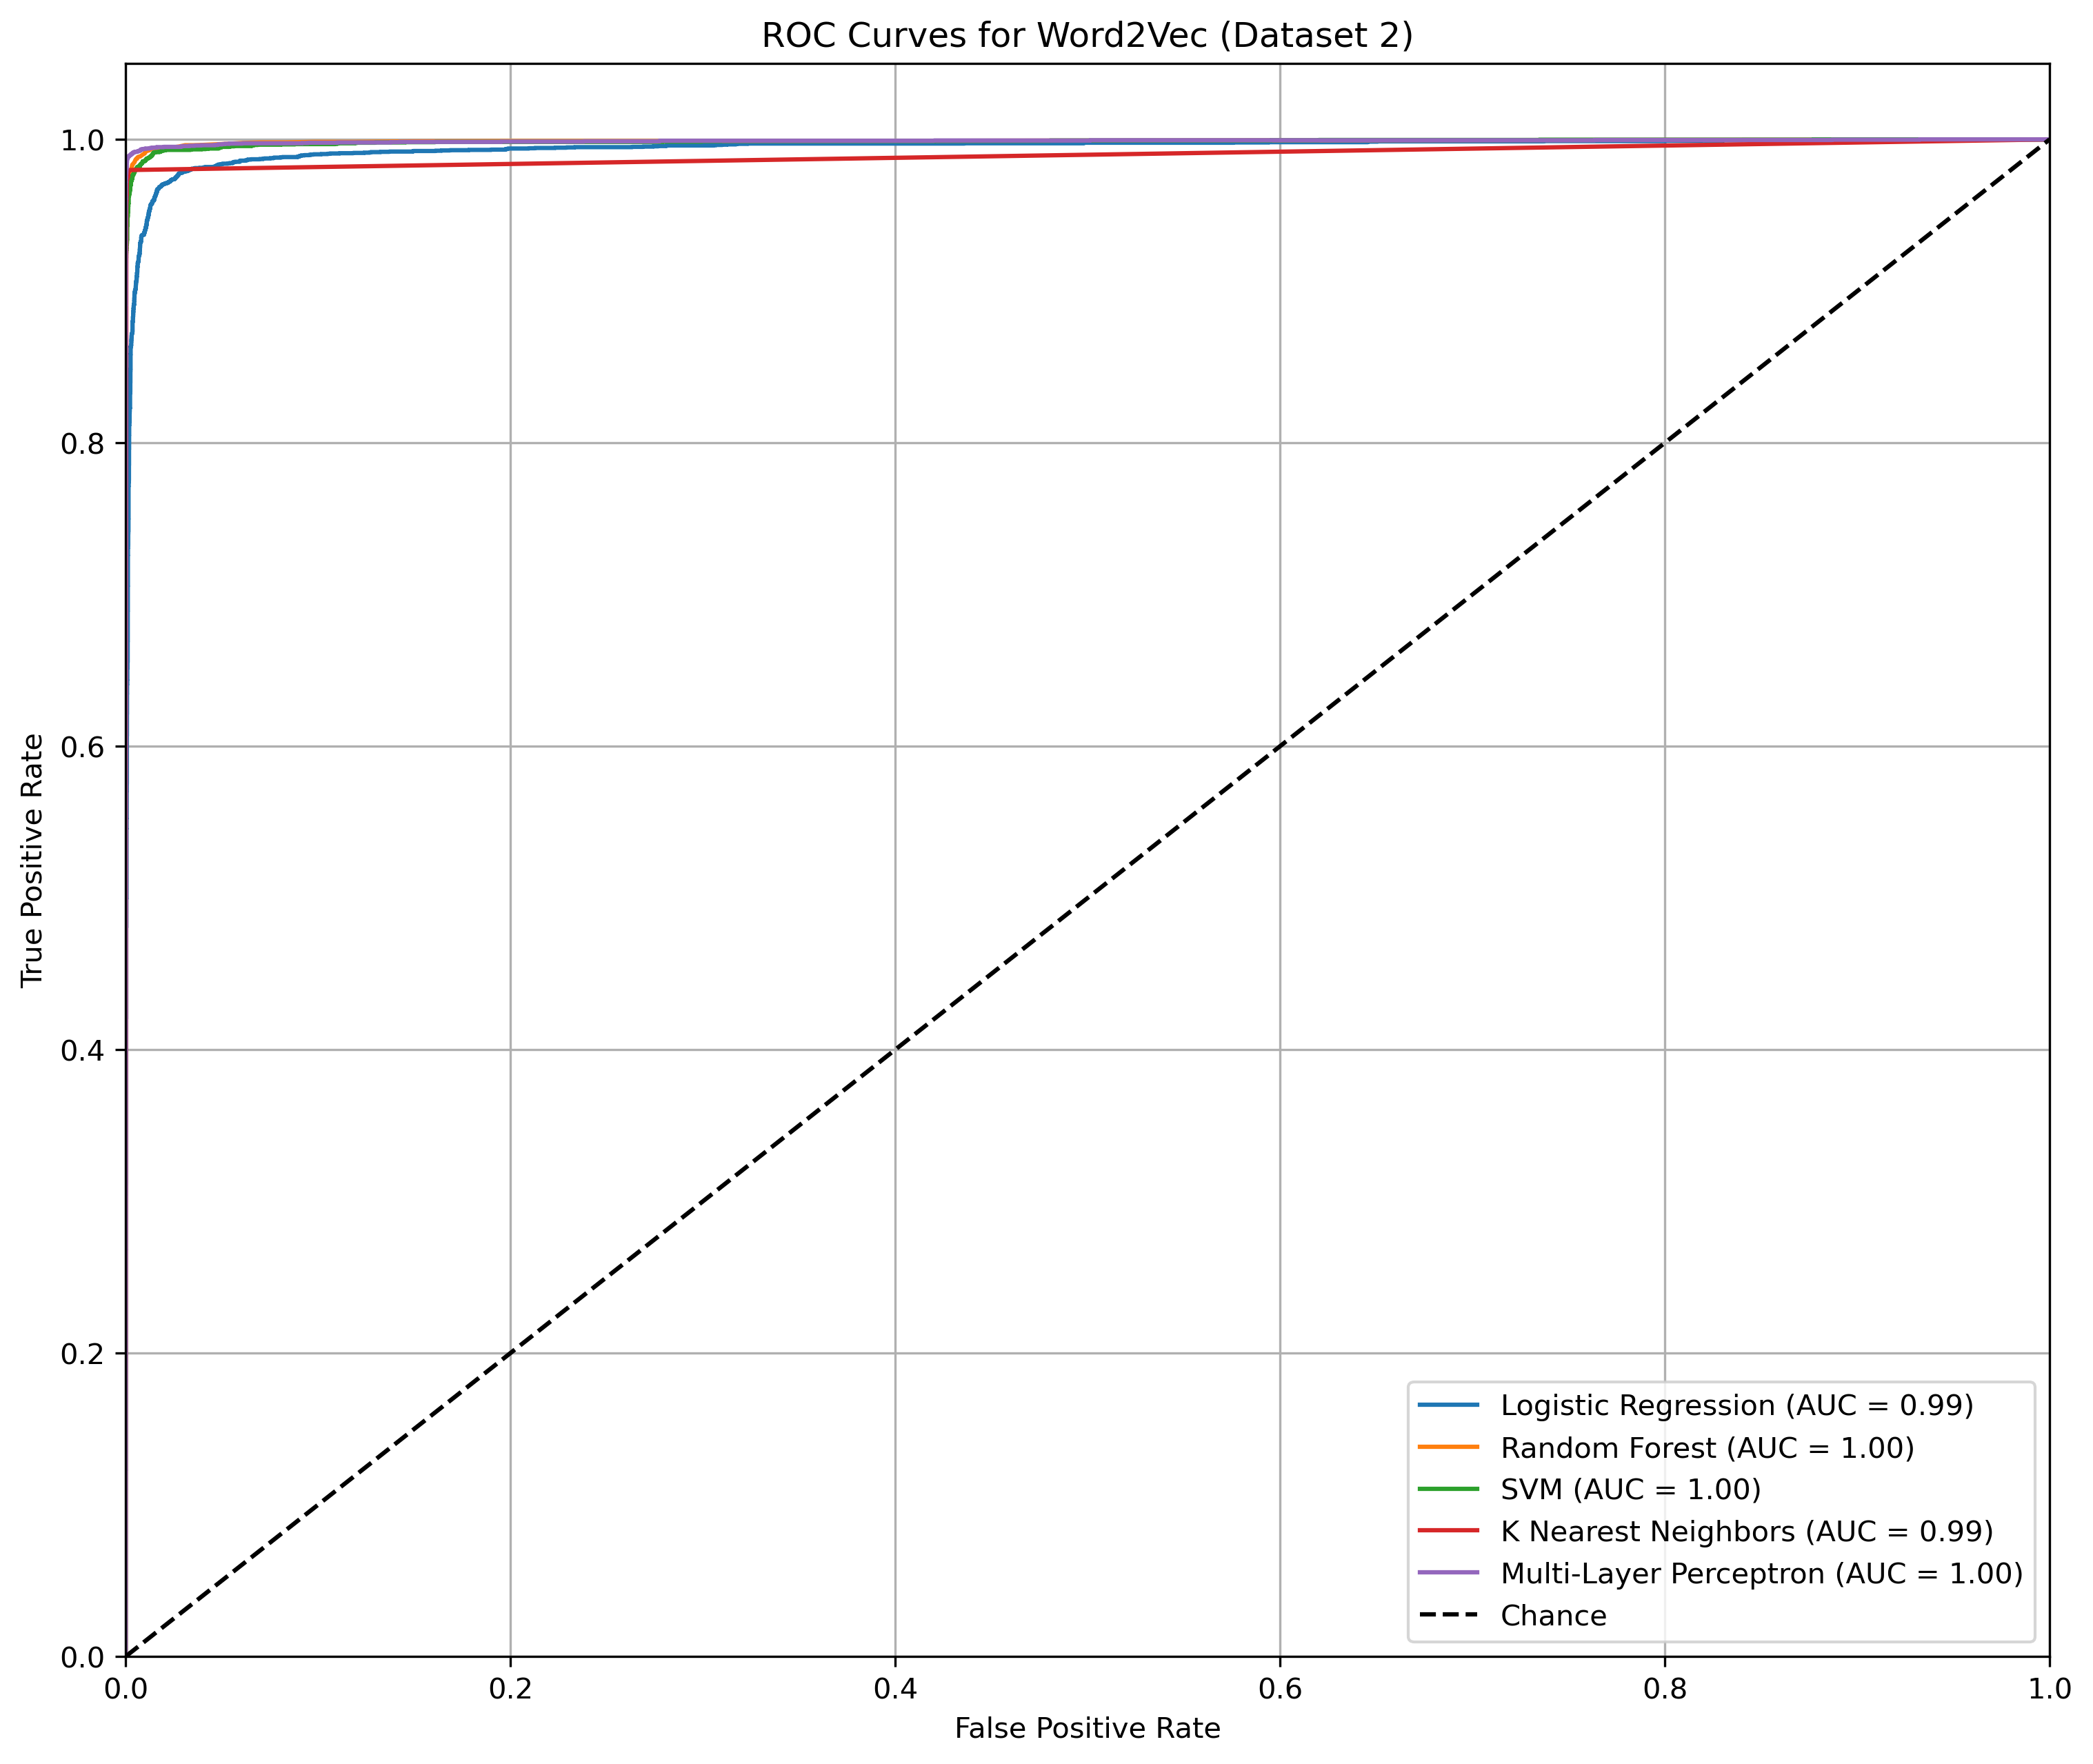

In [24]:
# ROC with Higher DPI for better resolution
model_files = [
    ('glove_lr_model2.pkl', 'Logistic Regression'),
    ('glove_rf_model2.pkl', 'Random Forest'),
    ('glove_svc_model2.pkl', 'SVM'),
    ('glove_knn_model2.pkl', 'K Nearest Neighbors'),
    ('glove_mlp_model2.pkl', 'Multi-Layer Perceptron')
]
df_test_glove_unstem.columns = df_test_glove_unstem.columns.astype(str)
plt.figure(figsize=(12, 10), dpi=300)  

for file, label in model_files:
    with open(file, 'rb') as f:
        model = pickle.load(f)
    try:
        y_proba = model.predict_proba(df_test_glove_unstem)[:, 1]
    except AttributeError:
        y_proba = model.decision_function(df_test_glove_unstem)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Word2Vec (Dataset 2)')
plt.legend(loc="lower right")
plt.grid(True)

# Save high-resolution version
plt.savefig("roc_curves_glove_dataset2.png", dpi=300, bbox_inches='tight')
plt.show()